In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

# Long-Short Term Memory

In [ ]:
import math
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
plt.style.use('fivethirtyeight')

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/SPP/VIC.csv")
df.head()

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,VIC,10/17/2018 9:39,98.5,98.5,98.5,98.5,390,0
1,VIC,10/17/2018 9:40,98.5,98.5,98.5,98.5,760,0
2,VIC,10/17/2018 9:41,98.6,98.6,98.6,98.6,2060,0
3,VIC,10/17/2018 9:42,98.6,98.6,98.6,98.6,5540,0
4,VIC,10/17/2018 9:43,98.6,98.7,98.6,98.7,760,0


In [ ]:
df.shape

(101266, 8)

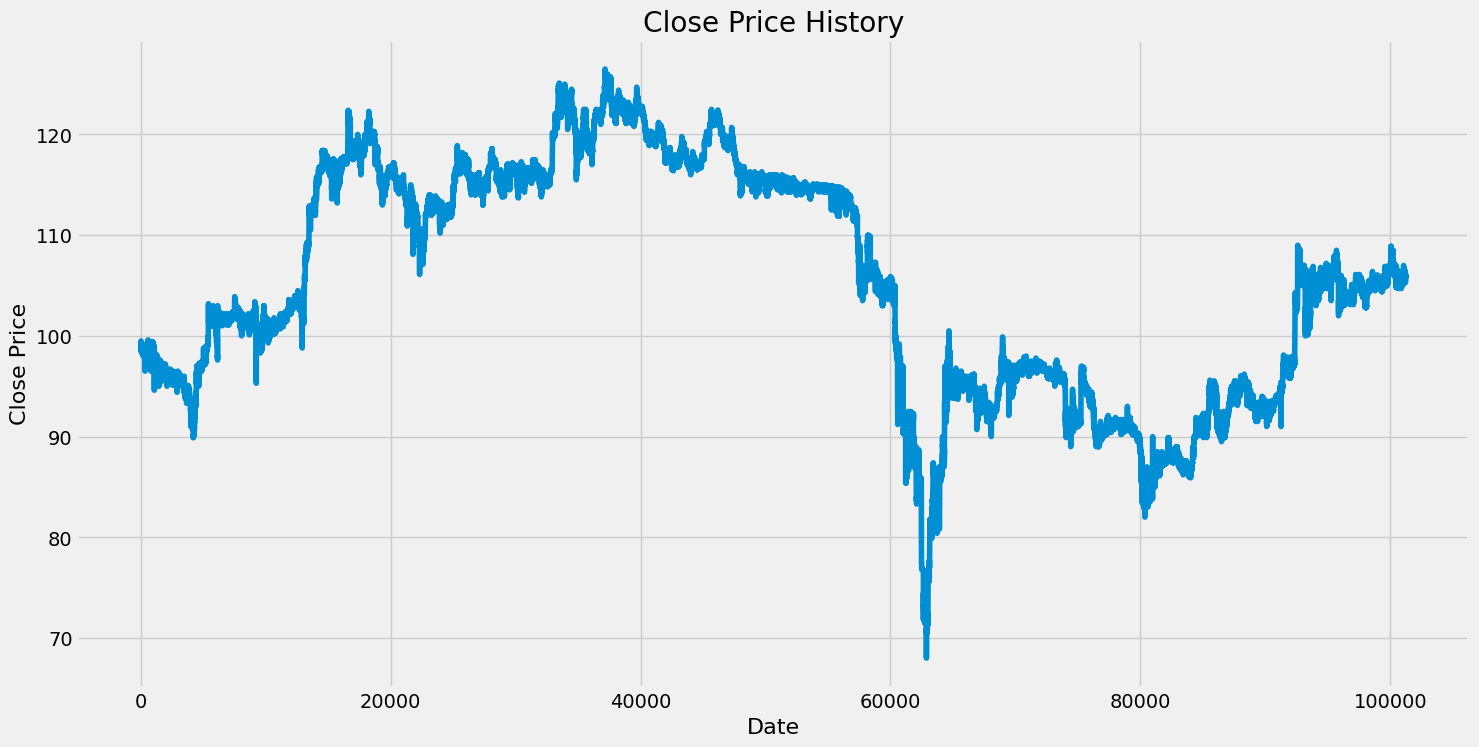

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=16)
plt.ylabel('Close Price', fontsize=16)
plt.show()

In [ ]:
#Create a new dataframe with only "Close" column
data = df.filter(['Close'])
#Convert dataframe into a numpy array
dataset = data.values
#Get the number of rows to train
train_data_len = math.ceil(len(dataset) * 0.8)
train_data_len

81013

In [ ]:
#Scale data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

#print(type(scaled_data))

In [ ]:
#Create training dataset
train_data = scaled_data[0: train_data_len, :]
#Split into X_train and y_train
X_train = []
y_train = []
for i in range(60, len(train_data)):
  X_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
print(len(X_train))
print(len(y_train))

80953
80953


In [ ]:
#Convert X_train, y_train into numpy arrays
X_train, y_train = np.array(X_train), np.array(y_train)
#Reshape
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train.shape[1])

60


In [ ]:
#LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#Compile model
model.compile(optimizer='adam', loss='mean_squared_error')
#Train model
model.fit(X_train, y_train, batch_size=128, epochs=10)

Epoch 1/10
633/633 [==============================] - 77s 114ms/step - loss: 0.0023
Epoch 2/10
633/633 [==============================] - 75s 118ms/step - loss: 3.3366e-05
Epoch 3/10
633/633 [==============================] - 73s 115ms/step - loss: 3.2435e-05
Epoch 4/10
633/633 [==============================] - 73s 115ms/step - loss: 3.1269e-05
Epoch 5/10
633/633 [==============================] - 73s 115ms/step - loss: 3.1116e-05
Epoch 6/10
633/633 [==============================] - 74s 117ms/step - loss: 3.1162e-05
Epoch 7/10
633/633 [==============================] - 73s 116ms/step - loss: 3.0676e-05
Epoch 8/10
633/633 [==============================] - 74s 117ms/step - loss: 3.2892e-05
Epoch 9/10
633/633 [==============================] - 75s 119ms/step - loss: 3.1077e-05
Epoch 10/10
633/633 [==============================] - 73s 116ms/step - loss: 2.9291e-05


In [ ]:
#Create testing dataset
test_data = scaled_data[train_data_len - 60: , :]
X_test = []
y_test = dataset[train_data_len: , :]
for i in range(60, len(test_data)):
  X_test.append(test_data[i-60:i, 0])


In [ ]:
X_test = np.array(X_test)

In [ ]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
#Predict
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)


633/633 [==============================] - 15s 22ms/step


In [ ]:
predictions

array([[ 87.01321 ],
       [ 87.017265],
       [ 87.01255 ],
       ...,
       [106.09175 ],
       [106.07146 ],
       [106.05385 ]], dtype=float32)

In [ ]:
#Root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
print(rmse)

0.2289406463528116


<ipython-input-107-f0da2275dcbf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


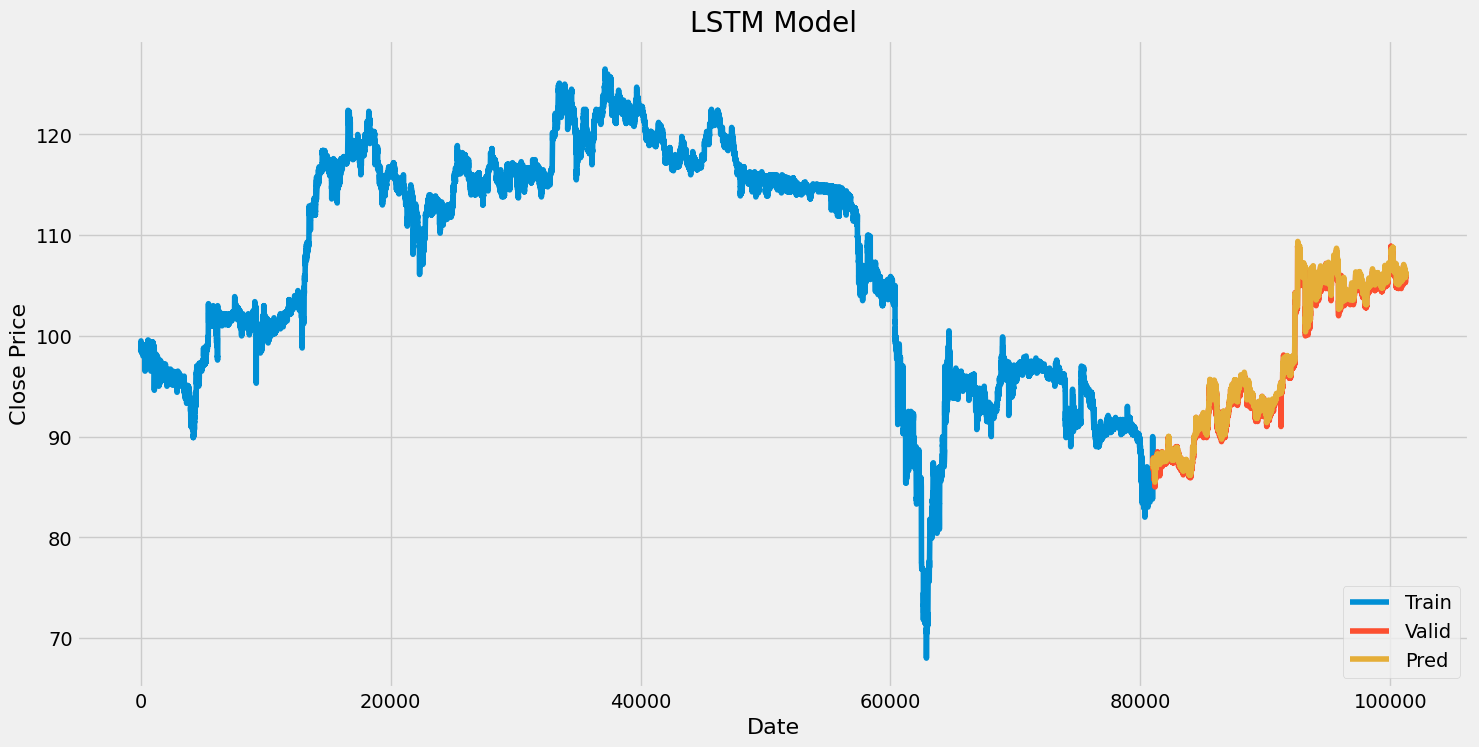

In [ ]:
#plot
train = data[:train_data_len]
valid = data[train_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16, 8))
plt.title('LSTM Model')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Close Price', fontsize=16)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Valid', 'Pred'], loc='lower right')
plt.show()

In [ ]:
#Show valid and predicted preices
valid

,Close,Predictions
81013,86.8,87.013206
81014,86.8,87.017265
81015,86.8,87.012550
81016,86.7,87.003174
81017,87.0,86.982132
...,...,...
101261,105.7,106.132736
101262,105.7,106.113159
101263,105.7,106.091751
101264,105.7,106.071457


# Linear Regression, Support Vector Regression and Decision Tree Regression

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn import metrics

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/SPP/PNJ.csv')
df2.head()

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,PNJ,2/28/2018 9:15,78.14,78.99,78.14,78.99,270,0
1,PNJ,2/28/2018 9:16,78.94,78.94,78.94,78.94,10,0
2,PNJ,2/28/2018 9:19,78.14,78.14,78.14,78.14,283,0
3,PNJ,2/28/2018 9:20,78.14,78.14,78.14,78.14,480,0
4,PNJ,2/28/2018 9:21,78.14,78.14,78.14,78.14,146,0


In [ ]:
print(df2.shape)
print(df2.info())

(125309, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125309 entries, 0 to 125308
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Ticker         125309 non-null  object 
 1   Date/Time      125309 non-null  object 
 2   Open           125309 non-null  float64
 3   High           125309 non-null  float64
 4   Low            125309 non-null  float64
 5   Close          125309 non-null  float64
 6   Volume         125309 non-null  int64  
 7   Open Interest  125309 non-null  int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 7.6+ MB
None


In [ ]:
df2.describe()

,Open,High,Low,Close,Volume,Open Interest
count,125309.000000,125309.000000,125309.000000,125309.000000,125309.000000,125309.0
mean,72.182052,72.372590,72.042287,72.179371,3031.830451,0.0
std,9.900263,9.995786,9.830847,9.899401,7248.952968,0.0
min,44.430000,44.530000,44.040000,44.140000,1.000000,0.0
25%,64.600000,64.700000,64.570000,64.600000,220.000000,0.0
50%,72.800000,73.010000,72.640000,72.830000,1000.000000,0.0
75%,80.160000,80.350000,80.060000,80.160000,3130.000000,0.0
max,100.160000,100.160000,100.160000,100.160000,580730.000000,0.0


In [ ]:
df2.isnull().sum()

Ticker           0
Date/Time        0
Open             0
High             0
Low              0
Close            0
Volume           0
Open Interest    0
dtype: int64

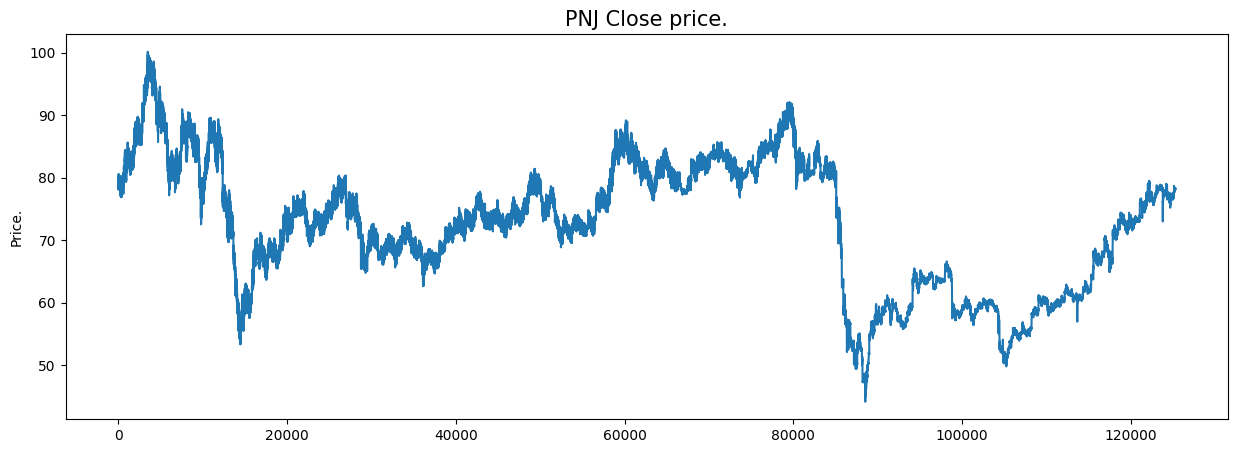

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(df2['Close'])
plt.title('PNJ Close price.', fontsize=15)
plt.ylabel('Price.')
plt.show()

In [ ]:
df2['Target'] = df2['Close'].diff()

df2.dropna(inplace=True)

df2

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest,Target
1,PNJ,2/28/2018 9:16,78.94,78.94,78.94,78.94,10,0,-0.05
2,PNJ,2/28/2018 9:19,78.14,78.14,78.14,78.14,283,0,-0.80
3,PNJ,2/28/2018 9:20,78.14,78.14,78.14,78.14,480,0,0.00
4,PNJ,2/28/2018 9:21,78.14,78.14,78.14,78.14,146,0,0.00
5,PNJ,2/28/2018 9:22,78.09,78.09,78.09,78.09,100,0,-0.05
...,...,...,...,...,...,...,...,...,...
125304,PNJ,12/22/2020 14:22,78.20,78.20,78.20,78.20,5000,0,-0.10
125305,PNJ,12/22/2020 14:23,78.20,78.20,78.20,78.20,1700,0,0.00
125306,PNJ,12/22/2020 14:24,78.20,78.20,78.20,78.20,870,0,0.00
125307,PNJ,12/22/2020 14:25,78.10,78.10,78.10,78.10,13000,0,-0.10


In [ ]:
features = df2[['Open', 'High', 'Low', 'Close']]
target = df2['Target']

In [ ]:
standard_scaler = StandardScaler()
features = standard_scaler.fit_transform(features)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.3, random_state=2022)
print(X_train.shape, X_test.shape)
print(X_train)

(87715, 4) (37593, 4)
[[-0.407263   -0.42243245 -0.3959216  -0.40702708]
 [ 1.55834422  1.52439126  1.583565    1.55875212]
 [ 1.03310488  1.00417115  1.05461689  1.03346683]
 ...
 [-0.31130581 -0.32739224 -0.44983362 -0.46056578]
 [ 0.98462125  0.95615084  1.00579091  0.98497895]
 [-1.94257798 -1.94307585 -1.94207764 -1.94247641]]


In [ ]:
X_train = pd.DataFrame(X_train, columns=['Open', 'High', 'Low', 'Close'])
X_test = pd.DataFrame(X_test, columns=['Open', 'High', 'Low', 'Close'])
y_train = pd.DataFrame(y_train, columns=['Target'])
y_test = pd.DataFrame(y_test, columns=['Target'])

In [ ]:
models = [LinearRegression(), SVR(kernel='linear'), DecisionTreeRegressor()]

for i in range(3):
  models[i].fit(X_train, y_train)
  print(f'{models[i]} : ')
  y_pred = models[i].predict(X_test)
  print('MSE:', metrics.mean_squared_error(y_test, y_pred))
  print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
  print('R2 score:', metrics.r2_score(y_test, y_pred))
  print()

LinearRegression() : 
MSE: 0.3607622385593322
MAE: 0.3236805335871021
R2 score: 0.2529563279221402



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear') : 
MSE: 0.3918435752235614
MAE: 0.2909426755929002
R2 score: 0.1885950578306328

DecisionTreeRegressor() : 
MSE: 0.4094441933840705
MAE: 0.3654586784272053
R2 score: 0.1521488087055194

